# 0505

Related links

- [Course website](https://www-math.nsysu.edu.tw/~chlin/2025SMath599/2025SMath599.html)
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)

## Data

In [1]:
### load nsysu

import os
import urllib
import numpy as np

base = r"https://github.com/SageLabTW/auto-grading/raw/master/nsysu-digits/"
for c in ['X', 'y']:
    filename = "nsysu-digits-%s.csv"%c
    if filename not in os.listdir('.'):
        print(filename, 'not found --- will download')
        urllib.request.urlretrieve(base + c + ".csv", filename)

Xsys = np.genfromtxt('nsysu-digits-X.csv', dtype=int, delimiter=',') ### flattened already
ysys = np.genfromtxt('nsysu-digits-y.csv', dtype=int, delimiter=',')

In [2]:
# load MNIST (long)

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

[Sample DataFrame](https://docs.google.com/spreadsheets/d/1pzcuTVMyRhBrwmcpOnGILUjMsPeF8fjkSSLwUuevXJ0/edit?usp=sharing)

In [3]:
from sklearn import datasets
titanic = datasets.fetch_openml(name='titanic', version=1, as_frame=True)

In [4]:
# required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## [Feature Engineering](https://jakevdp.github.io/PythonDataScienceHandbook/05.04-feature-engineering.html)

categorial data

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()
y = iris.target
x= iris.data
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
data = [["cat"],
        ["dog"],
        ["dino"],
        ["cat"],
        ["dino"]]
OneHotEncoder(sparse_output=False).fit_transform(data)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [7]:
# DictVectorizer
from sklearn.feature_extraction import DictVectorizer
data = [{"gender":"male","age":30},
        {"gender":"female,","age":40},
        {"gender":"male","age":50},
        {"gender":"female,","age":60}]
vec = DictVectorizer(sparse = False)
print(vec.fit_transform(data))
print(vec.get_feature_names_out())

[[30.  0.  1.]
 [40.  1.  0.]
 [50.  0.  1.]
 [60.  1.  0.]]
['age' 'gender=female,' 'gender=male']


text data

In [8]:
# CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
 
data = ["This is is a book.",
        "This is a pen.", 
        "This is a pineapple."]
vec = CountVectorizer(stop_words=["is", "a"]) # is and a 被幹掉
print(vec.fit_transform(data).toarray())
print(vec.get_feature_names_out())
print(vec.get_stop_words())

df = pd.DataFrame(vec.fit_transform(data).toarray(), columns=vec.get_feature_names_out())
df

[[1 0 0 1]
 [0 1 0 1]
 [0 0 1 1]]
['book' 'pen' 'pineapple' 'this']
frozenset({'a', 'is'})


,book,pen,pineapple,this
0,1,0,0,1
1,0,1,0,1
2,0,0,1,1


In [9]:
# TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(stop_words=["is", "a"]) # is and a 被幹掉
data = ["This is is a book",
        "This is a pen",
        "This is a pineapple"]
print(vec.fit_transform(data).toarray())
print(vec.get_feature_names_out())
print(vec.get_stop_words())

df = pd.DataFrame(vec.fit_transform(data).toarray(), columns=vec.get_feature_names_out())
df

[[0.861037   0.         0.         0.50854232]
 [0.         0.861037   0.         0.50854232]
 [0.         0.         0.861037   0.50854232]]
['book' 'pen' 'pineapple' 'this']
frozenset({'a', 'is'})


,book,pen,pineapple,this
0,0.861037,0.000000,0.000000,0.508542
1,0.000000,0.861037,0.000000,0.508542
2,0.000000,0.000000,0.861037,0.508542


image data

In [10]:
# flatten
Xsys[0].shape

(784,)

[Scikit-Image project](https://scikit-image.org/)

[Application: A Face Detection Pipeline](https://jakevdp.github.io/PythonDataScienceHandbook/05.14-image-features.html)

generate new feature

In [11]:
# x^2
w = np.array([1,2,3,4,5])*10
h = np.array([180,170,180,170,180])
df = pd.DataFrame({"weight":w,
                  "height":h})
df["BMI"] = df["weight"]/(df["height"]/100)**2
df

,weight,height,BMI
0,10,180,3.086420
1,20,170,6.920415
2,30,180,9.259259
3,40,170,13.840830
4,50,180,15.432099


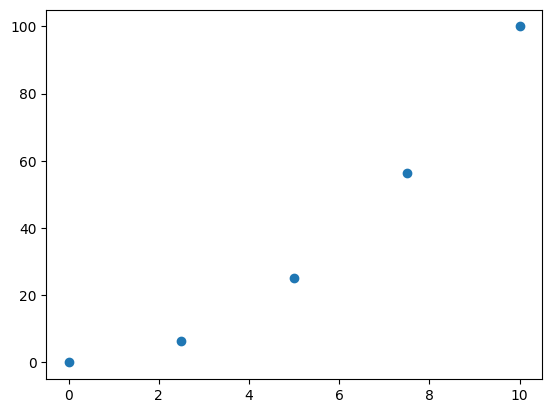

In [12]:
x = np.linspace(0,10,5)
y = x**2 + np.random.randn(5)*0.01
plt.scatter(x, y)

In [13]:
df = pd.DataFrame({
    "1": 1, 
    "x": x, 
    "x**2": x**2
})
df

,1,x,x**2
0,1,0.0,0.00
1,1,2.5,6.25
2,1,5.0,25.00
3,1,7.5,56.25
4,1,10.0,100.00


feature pipelines

In [14]:
# make_pipeline

## [In Depth: Naive Bayes Classification](https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html)

1. Guess the normal distributions.
2. If you got a point, it is more likely from which distribution.

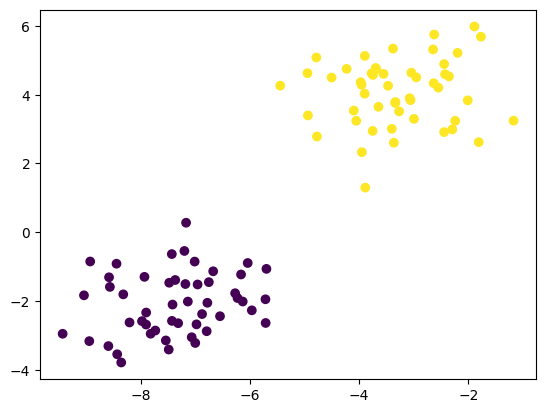

In [15]:
# make_blobs
from sklearn.datasets import make_blobs
x,y = make_blobs(100,2,centers=2)
plt.scatter(*x.T,c=y)

In [16]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x,y)

GaussianNB()

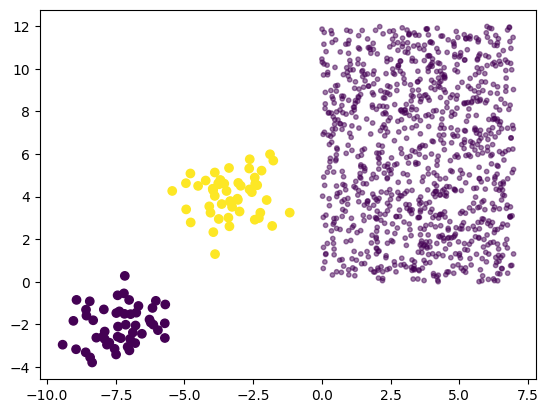

In [17]:
data_x = 7*np.random.rand(1000) # (0,1)->(-11,-4)
data_y = 12*np.random.rand(1000) # (0,1)->(0,12)
x_new = np.vstack([data_x, data_y]).T
plt.scatter(*x_new.T,s=10,alpha=0.5,c=model.predict(x_new)) # 測試資料丟入model中，c=model.predict(x_new)=>分群給顏色
plt.scatter(*x.T,c=y) # 原本的資料

## [In Depth: Linear Regression](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html)

1. Find appropriate $\mathbf{c}$ such that $X\mathbf{c} = \mathbf{y}$.
2. Add a column of ones if necesary.

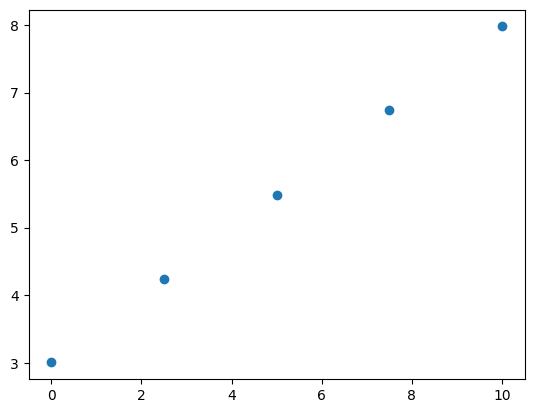

In [18]:
x = np.linspace(0,10,5)
y = 3 + 0.5*x +0.01*np.random.randn(5)
plt.scatter(x, y)

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True) # fit_intercept=True:有截距
model.fit(x[:,np.newaxis],y)

LinearRegression()

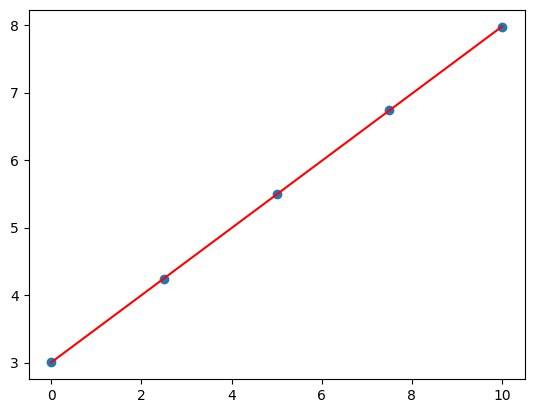

In [20]:
x_new = np.linspace(0,10,1000)[:,np.newaxis] # 1000個點
y_new = model.predict(x_new) # 預測
plt.plot(x_new, y_new, color='red', label='predicted')
plt.scatter(x, y, label='data')

In [21]:
print(model.coef_) # 斜率 ~b
print(model.intercept_) # ~a

[0.49795926]
3.0010257239528597


polynomial regression

pipeline

## Homework

- Type your answers here and submit your answer in `*.ipynb` format.
- You may use code cell and Markdown cell.

In [22]:
NAME = "李瑋宸" # change to your name
STD_ID = "B123245008" # change to your student ID
print("My name is %s and my student ID is %s."%(NAME, STD_ID))

My name is 李瑋宸 and my student ID is B123245008.


In [23]:
%pip install kagglehub

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Exercise 1: Polynomial Features

Given a 1D dataset of housing prices and square footage, transform the features into a polynomial feature space up to degree 3. Fit a linear model and compare it with a model using only the original features.

(545, 1) (545,)


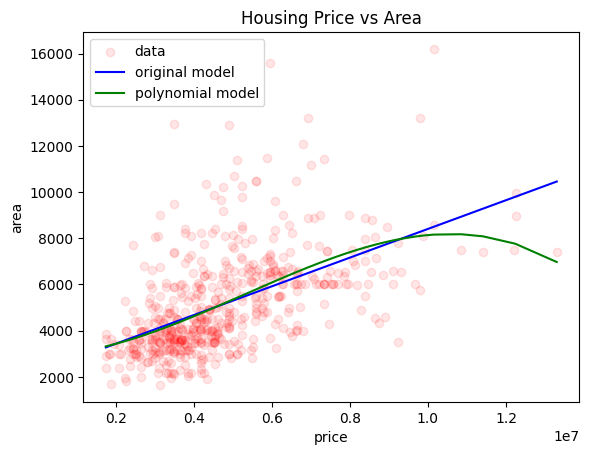

In [1]:
import kagglehub
import os
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

path = kagglehub.dataset_download("yasserh/housing-prices-dataset")
df = pd.read_csv(os.path.join(path,"housing.csv"))
df.head()

x_house_price = df[["price"]].values
y_house_area = df["area"].values

print(x_house_price.shape, y_house_area.shape)
original_model = LinearRegression().fit(x_house_price, y_house_area)

poly = PolynomialFeatures(degree=3, include_bias=False)
x_house_price_poly = poly.fit_transform(x_house_price)
poly_model = LinearRegression().fit(x_house_price_poly, y_house_area)

sort_idx = np.argsort(x_house_price[:, 0])
x_house_price_sorted = x_house_price[sort_idx]

plt.scatter(x_house_price, y_house_area, alpha=0.1, label="data", color="red")
plt.plot(x_house_price_sorted, original_model.predict(x_house_price_sorted), label="original model", color="blue")
plt.plot(x_house_price_sorted, poly_model.predict(poly.transform(x_house_price_sorted)), label="polynomial model", color="green")
plt.xlabel("price")
plt.ylabel("area")
plt.legend()
plt.title("Housing Price vs Area")
plt.show()





### Exercise 2: Categorical Encoding

You are provided with a dataset of car listings including categorical variables like brand, fuel type, and transmission. Use one-hot encoding to convert these features into numeric format. Discuss the dimensionality impact.

In [25]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
data = {'brand': ['Toyota', 'Honda', 'Toyota', 'BMW', 'Honda', 'Ford'],
        'fuel_type': ['Petrol', 'Petrol', 'Diesel', 'Petrol', 'Electric', 'Diesel'],
        'transmission': ['Automatic', 'Manual', 'Automatic', 'Automatic', 'Automatic', 'Manual'],
        'price': [20000, 18000, 22000, 35000, 25000, 15000]}
df = pd.DataFrame(data)

dfbrand = pd.DataFrame(df['brand'])
dffuel_type = df[['fuel_type']]
dftransmission = df[['transmission']]
dfprice = df[['price']]

print("brand\n",OneHotEncoder(sparse_output=False).fit_transform(dfbrand))
print("fuel_type\n",OneHotEncoder(sparse_output=False).fit_transform(dffuel_type))
print("transmission\n",OneHotEncoder(sparse_output=False).fit_transform(dftransmission))
print("price\n",OneHotEncoder(sparse_output=False).fit_transform(dfprice))


brand
 [[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]
fuel_type
 [[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
transmission
 [[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]
price
 [[0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]]


### Exercise 3: Imputation

Download a dataset (e.g., Titanic or Housing) with missing values. Use `SimpleImputer` to fill in missing values using different strategies (mean, median, most frequent). Evaluate how the model performance varies.

In [26]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

titanic = fetch_openml(name='titanic', version=1, as_frame=True)
titanic_data = titanic.data
titanic_target = titanic.target

numeric_cols = titanic_data.select_dtypes(include=["number"]).columns
titanic_data_numeric = titanic_data[numeric_cols]

simpleimputer_mean = SimpleImputer(strategy='mean')
titanic_data_numeric_mean = simpleimputer_mean.fit_transform(titanic_data_numeric)
titanic_data_numeric_mean = pd.DataFrame(titanic_data_numeric_mean, columns=numeric_cols)
x_train, x_test, y_train, y_test = train_test_split(titanic_data_numeric_mean, titanic_target)
model = DecisionTreeClassifier(random_state=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with mean imputation:", accuracy)

simpleimputer_median = SimpleImputer(strategy='median')
titanic_data_numeric_median = simpleimputer_median.fit_transform(titanic_data_numeric)
titanic_data_numeric_median = pd.DataFrame(titanic_data_numeric_median, columns=numeric_cols)
x_train, x_test, y_train, y_test = train_test_split(titanic_data_numeric_median, titanic_target)
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with median imputation:", accuracy)

simpleimputer_most_frequent = SimpleImputer(strategy='most_frequent')
titanic_data_numeric_most_frequent = simpleimputer_most_frequent.fit_transform(titanic_data_numeric)
titanic_data_numeric_most_frequent = pd.DataFrame(titanic_data_numeric_most_frequent, columns=numeric_cols)
x_train, x_test, y_train, y_test = train_test_split(titanic_data_numeric_most_frequent, titanic_target)
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with most frequent imputation:", accuracy)


Accuracy with mean imputation: 0.7164634146341463
Accuracy with median imputation: 0.6310975609756098
Accuracy with most frequent imputation: 0.6646341463414634


### Exercise 4: Feature Scaling

Compare the performance of a logistic regression model on a dataset with and without feature scaling using `StandardScaler`. Discuss why scaling matters.

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

iris = load_iris()
x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y)
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy without scaling:", accuracy)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
model = LogisticRegression()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with StandardScaler:", accuracy)



Accuracy without scaling: 0.9736842105263158
Accuracy with StandardScaler: 0.9736842105263158


### Exercise 5: Text Classification with Naive Bayes

Use the `20newsgroups` dataset from scikit-learn. Preprocess the text using `CountVectorizer`, and train a `MultinomialNB` classifier. Use cross-validation to evaluate precision.

In [36]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

twentynewsgroups = fetch_20newsgroups()
x = twentynewsgroups.data
y = twentynewsgroups.target

vectorizer = CountVectorizer()
x_vectorized = vectorizer.fit_transform(x)
model = MultinomialNB()
scores = cross_val_score(model, x_vectorized, y, cv=5)
print("Cross-validation scores:", scores)



Cross-validation scores: [0.83870968 0.83826779 0.82368537 0.83031374 0.83642794]


### Exercise 6: Naive Bayes on Numerical Data

Use the Iris dataset and apply GaussianNB to classify iris species based on petal and sepal measurements. Visualize the decision boundaries using petal length and petal width.

Accuracy with GaussianNB: 0.9736842105263158


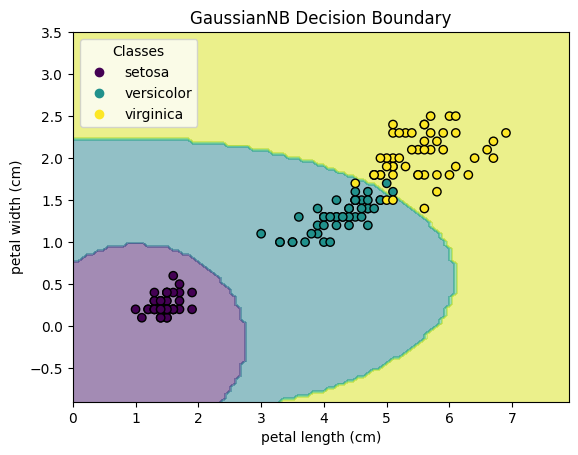

In [29]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y)
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with GaussianNB:", accuracy)

x = iris.data[:,2:4]  
y = iris.target

model = GaussianNB()
model.fit(x,y)

disp = DecisionBoundaryDisplay.from_estimator(
    model, x, response_method="predict",
    xlabel=iris.feature_names[2], ylabel=iris.feature_names[3],
    alpha=0.5,
)
scatter = disp.ax_.scatter(x[:,0], x[:,1], c=y, edgecolor="k")
plt.title("GaussianNB Decision Boundary")
plt.legend(scatter.legend_elements()[0], iris.target_names, title="Classes")
plt.show()

# data = pd.DataFrame(x, columns=iris.feature_names)


### Exercise 7: GaussianNB Parameters

What parameters are trained in GaussianNB?  Explain some of them in your previous exercise.

In [30]:
#For the first question, it contains all the data and targets.
#For the second question, it contains only the data with last two feature and target.

### Exercise 8: Simple Linear Regression

Let `x = np.array([1,2,3,4,5])` and `y = np.array([1,1,2,2,4])`. Plot the regression line and interpret the coefficients.

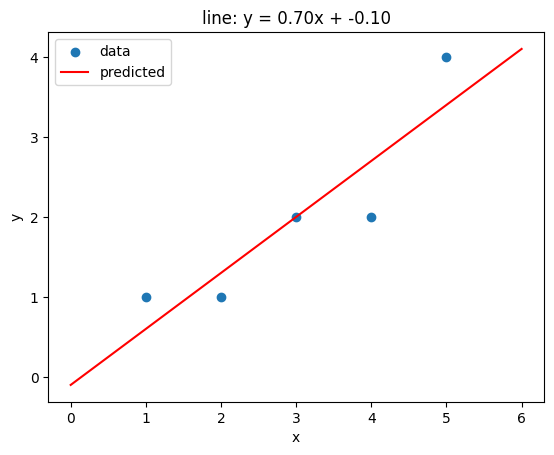

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.array([1,2,3,4,5])
y = np.array([1,1,2,2,4])

model = LinearRegression(fit_intercept=True)
model.fit(x[:,np.newaxis],y)
x_new = np.linspace(0,6,100)[:,np.newaxis]
y_new = model.predict(x_new)
plt.scatter(x, y, label='data')
plt.plot(x_new, y_new, color='red', label='predicted')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
string = "line: " + "y = %.2fx + %.2f" % (model.coef_[0], model.intercept_)
plt.title(string)
plt.show()


### Exercise 9: Multivariate Linear Regression

Let  

```python
X = np.array([
    [1,0],
    [0,1],
    [0,1]
])
y = np.array([1,2,3])
```

Use `LinearRegression` to estimate `y` from `X` with `fit_intercept=False` and analyze and meaning of each coefficient.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
x = np.array([
    [1,0],
    [0,1],
    [0,1]
])
y = np.array([1,2,3])
model = LinearRegression(fit_intercept=False)
model.fit(x,y)
string = "line: " + "y = %.2fx_1 + %.2fx_2 + 0" % (model.coef_[0], model.coef_[1])
print(string)

# Analysis of the Coefficients:
# The equation of the fitted line is: y = 1.00x_1 + 2.50x_2 + 0
# Coefficient of x_1 (1.00):
#   - When x_1 is 1 and x_2 is 0, the predicted value of y is approximately 1.00.
#   - This suggests that the first feature (represented by x_1) has a positive impact on y.
# Coefficient of x_2 (2.50):
#   - When x_1 is 0 and x_2 is 1, the predicted value of y is approximately 2.50.
#   - This suggests that the second feature (represented by x_2) also has a positive impact on y.

line: y = 1.00x_1 + 2.50x_2 + 0


### Exercise 10: Polynomial Regression

Let `x = np.array([0,1,2])` and `y = np.array([0,1.1,3.9])`.  Use polynomial regression to estimate `y` from `x`.

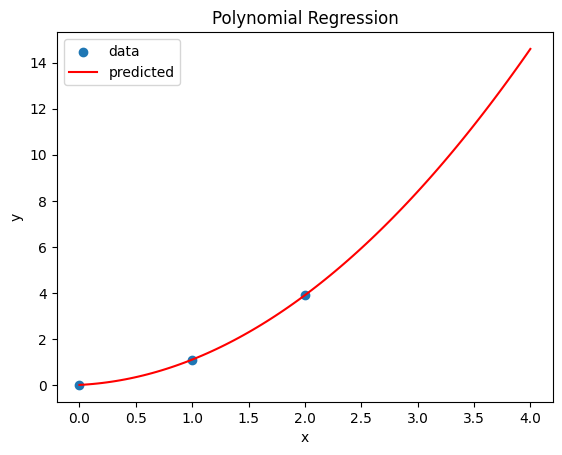

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
x = np.array([0,1,2]) 
y = np.array([0,1.1,3.9])
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_x = poly.fit_transform(x[:,np.newaxis])
model = LinearRegression(fit_intercept=True) 
model.fit(poly_x,y)

x_new = np.linspace(0,4,100)[:,np.newaxis]
poly_x_new = poly.transform(x_new)
y_pred = model.predict(poly_x_new)
plt.scatter(x, y, label='data')
plt.plot(x_new, y_pred, color='red', label='predicted')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Polynomial Regression")
plt.show()
